# Scikit-Learn in Manami09

# Summary of Q1: Data Cleaning and Feature Engineering

=======================================================================================================================

># Data Cleaning

>>***Strategies of Data Cleaning***
>>1. Load data and view its info and the shape of dataset
     
                 Check shape, data types and find some special characters needed to be handled.
                 Data shape is (1788, 101).
     
>>2. Data Cleaning:

                 (1) [4 col, 2 row dropped (1786, 97)]---Delete columns with full-null values. 
                 (2) [No change]------------Identify Columns That Contain a Single Value and delete
                 (3) Divide dataset into catagorial type and float type. And then cleaning data seperately and then 
                     contact them 2 together.
                     (3.1) [No drop]------All float columns' unique percentage are more than 1%. All categorial columns 
                                          are not null.
                     (3.2) [3 col dropped (1786,94)]-----Delete unrelated categorial columns: Geochemistry Reference, 
                                                          Sample, and the column with to many null(1506) - Age Reference.
                     (3.3) [20 col dropped (1786,74)]----Remove float columns that have a low variance, threshold is 0.5.
                     (3.4) [2 row dropped (1784, 74)]----Delete duplicated rows/columns.
                     (3.5) [27 col dropped (1784, 47)]---Drop float columns with 60% null values.
                     (3.6) [No drop]---Fill null value in float columns with average value.
                     (3.7) [No drop]---Cleaning special characters in the rest float columns and transfer type from 
                                       object to float.
                     (3.9) [No drop]---Fill null value in new float columns with average value.
                     (3.10) [11 row dropped (1773, 47)]---Contact float and categorial columns. Delete rows with null 
                                                           in categorial columns.
                     (3.11) [No drop]---Get rid of data redundancy: delete special characters and spaces, change 
                                        characters into lower case.

    And the final dataset shape is (1773, 47). 


># Feature Engineering:
                    
                    (1) Check columns of float type and categorial type after data cleaning.
                    (2) Use OneHotEncoder to encode 6 input categorial features.
                    (3) Use LabelEncoder to encode 1 output feature 'sample_type'.
                    (4) Delete the non-numeric columns.
                  
    After Feature Engineering, the final dataset shape is (1773, 504).
    No samples having missing values, and all the non-numeric features into numbers.
                   
 =======================================================================================================================
              

# Details are as follows...

**>> View data dataset**

In [1]:
import pandas as pd
df = pd.read_csv('Mamani09_Table_DR2_V2.csv')
print(df.head())
print("info is:",df.info())
print("shape is:", df.shape)

           Arc     Sample   Location Geologycal_age   Domain Sample_type  \
0  Frontal arc  SAR-00-08  Sara Sara     Quaternary  Paracas        lava   
1  Frontal arc  SAR-00-07  Sara Sara     Quaternary  Paracas        lava   
2  Frontal arc  SAR-00-13  Sara Sara     Quaternary  Paracas        lava   
3  Frontal arc  SAR-00-06  Sara Sara     Quaternary  Paracas  ignimbrite   
4  Frontal arc  SAR-00-10  Sara Sara     Quaternary  Paracas  ignimbrite   

  Rock_type Geochemistry Reference Country  Age  (Ma)  ... 143_144Nd  \
0  andesite    Mamani et al., 2008    Peru       1.62  ...   0.51247   
1  andesite    Mamani et al., 2008    Peru        NaN  ...       NaN   
2  andesite    Mamani et al., 2008    Peru        NaN  ...   0.51246   
3  rhyolite    Mamani et al., 2008    Peru        NaN  ...       NaN   
4  rhyolite    Mamani et al., 2008    Peru        NaN  ...       NaN   

  143_144Nd_error  eNd  TDM ages  206_204Pb  206Pb_error  207_204Pb  \
0         0.00001 -3.3       0.9     18

**>> Delete columns with full-null value**

View the summary of null by columns

In [2]:
df.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

Unnamed: 87               1788
Unnamed: 28               1788
Unnamed: 44               1788
Unnamed: 81               1788
H2O+                      1686
                          ... 
Geochemistry Reference       2
Sample_type                  2
Domain                       2
Geologycal_age               2
Arc                          2
Length: 101, dtype: int64

**It can be concluded that:
 4 columns are full null, need to be drop:
  Unnamed: 87, Unnamed: 28, Unnamed: 44, Unnamed: 81**


In [3]:
print("Shape of Catagorial dataset before dropping full-null columns", df.shape)
df1 = df.dropna(axis=1, how='all')
df1 = df1.dropna(axis=0, how='all')
# Deal the title for convenience: Remove the single and double quotation marks and spaces that appear in the column name
df1 = df1.rename(columns=lambda x: x.replace("'","").replace('"','').replace(" ","_").lower())
print("Shape of Catagorial dataset after dropping full-null columns", df1.shape)


Shape of Catagorial dataset before dropping full-null columns (1788, 101)
Shape of Catagorial dataset after dropping full-null columns (1786, 97)


**>> Identify Columns That Contain a Single Value and delete**

As following, no single value and no need to delete in this step

In [4]:
print("Shape of Catagorial dataset before dropping useless columns", df1.shape)
# summarize the number of unique values in each column
counts = df1.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print("columns to delete are:", to_del) 
# drop useless columns
df1.drop(to_del, axis=1, inplace=True)
print("Shape of Catagorial dataset after dropping useless columns", df1.shape)

Shape of Catagorial dataset before dropping useless columns (1786, 97)
columns to delete are: []
Shape of Catagorial dataset after dropping useless columns (1786, 97)


**Divide dataset into catagorial type and float type.**


**>> For floar type:**

The results as following shows that no column has less than 1% unique value, so it is no need to clean dataset in this step.

In [5]:
from numpy import unique
df1_float = df1.select_dtypes(include=float) # choose float-type columns to check unique percentage
df1_cat = df1.select_dtypes(exclude=float) # choose other-type(excluding float) columns to check unique percentage

for i in range(df1_float.shape[1]):
    num = len(unique(df1_float.iloc[:, i]))
    percentage = float(num) / df1_float.shape[0] * 100
    unique.list = []
    if percentage < 1:
        k = 1
        print("Float column index %d has unique pertage <1%, unique count is %d, unique percentage is %.1f%%" % (i, num, percentage))
    else:
        k = 0

if k == 0:
    print("All float columns' unique percentage are more than 1%.")

All float columns' unique percentage are more than 1%.


**>> For catagorial type:**

**Drop columns with all NULL**

In [6]:
print("Shape of Catagorial dataset before drop null columns", df1_cat.shape)
df1_cat2 = df1_cat.dropna(axis=1, how='all')
print("Shape of Catagorial dataset after drop null columns", df1_cat2.shape)

Shape of Catagorial dataset before drop null columns (1786, 18)
Shape of Catagorial dataset after drop null columns (1786, 18)


**As above we can see the categorial columns, but some of them are acutually numerical columns.**

(1) The real categorial columns are:

arc, sample, location, geologycal_age, domain, sample_type, rock_type, geochemistry_reference, country, age_reference


So:

1. Considering 'Sample_type', delete unrelated columns: Geochemistry Reference, Sample, and the column with to many null(1506) - Age Reference.


2. View non-real categorial columns and found :

   ['error_(ma)', 'feo', '87_86sr_error', 'zn_icpms', 'cs_icpms', 'tb_icpms', 'zn_xrf', 'co_xrf']


   There are Special characters in these columns.

In [7]:
print(df1.shape)
df1.drop(['geochemistry_reference', 'sample', 'age_reference'],inplace=True,axis=1)
print(df1.shape)


(1786, 97)
(1786, 94)


**>> Deal with float type columns: Remove Columns That Have A Low Variance**

(1786, 79)
>Threshold=0.00, Features=79
>Threshold=0.05, Features=68
>Threshold=0.10, Features=66
>Threshold=0.15, Features=64
>Threshold=0.20, Features=64
>Threshold=0.25, Features=64
>Threshold=0.30, Features=64
>Threshold=0.35, Features=63
>Threshold=0.40, Features=62
>Threshold=0.45, Features=60
>Threshold=0.50, Features=59


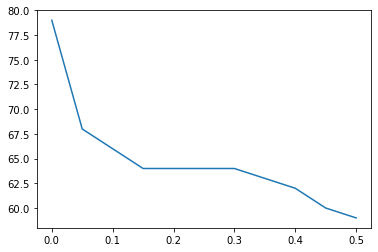

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None) #display all columns
pd.set_option('display.max_rows', None) #display all rows

# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# split data into inputs and outputs
X = df1_float
print(X.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    constant_filter = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = constant_filter.fit_transform(X)
    X_sel1 = constant_filter.get_support()
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    # plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

**>> Choose the variance threshold=0.5 to get columns causing low variance**

In [9]:
print("Shape of dataset before drop low variance columns:", df1.shape)
# Choose the variance threshold=0.5 to get columns causing low variance
constant_filter = VarianceThreshold(threshold=0.5)
constant_filter.fit_transform(X)
len(X.columns[constant_filter.get_support()])
# find columns' names that need to be deleted.
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

print("There are %s columns need to be drop because of low variance:" %len(constant_columns))

# Remove Columns That Have A Low Variance
for column in constant_columns:
    df1.drop([column],inplace=True,axis=1)
    print("Drop column %s" %column)
    continue
print("Shape of dataset after drop low variance columns:", df1.shape)

Shape of dataset before drop low variance columns: (1786, 94)
There are 20 columns need to be drop because of low variance:
Drop column tio2
Drop column mno
Drop column p2o5
Drop column cd_icpms
Drop column eu_icpms
Drop column ho_icpms
Drop column er_icpms
Drop column tm_icpms
Drop column yb_icpms
Drop column dy/yb
Drop column 87_86sr
Drop column 87_86sr_initial
Drop column 143_144nd
Drop column 143_144nd_error
Drop column tdm_ages
Drop column 206_204pb
Drop column 206pb_error
Drop column 207_204pb
Drop column 207pb_error
Drop column 208pb_error
Shape of dataset after drop low variance columns: (1786, 74)


**>> Consider duplicated rows/columns and delete**

As shown as following:

2 rows duplicated, no duplicated columns


In [10]:
a = df1.duplicated() # check if there is duplicated rows and drop them: row
print("Shape of dataset before drop duplucated rows:", df1.shape)
df2 = df1.drop_duplicates()
print("Shape of dataset after drop duplucated rows:",df2.shape)

df2.T.duplicated()
print("Shape of dataset before drop duplucated columns:", df2.shape)
df2.T.drop_duplicates().T
print("Shape of dataset after drop duplucated columns:", df2.shape)

Shape of dataset before drop duplucated rows: (1786, 74)
Shape of dataset after drop duplucated rows: (1784, 74)
Shape of dataset before drop duplucated columns: (1784, 74)
Shape of dataset after drop duplucated columns: (1784, 74)


***>> Drop columns with 60% null***

In [11]:
print(df2.shape)
df2 = df2.dropna(thresh=len(df2) * 0.60,axis=1)
print(df2.shape)

(1784, 74)
(1784, 47)


**>> Split dataset into float type and categorial type**

In [12]:
df2_float = df2.select_dtypes(include=float) # choose float-type columns to check unique percentage
df2_cat = df2.select_dtypes(exclude=float) # choose other-type(excluding float) columns to check unique percentage
print(df2_float.columns)
print(df2_cat.columns)
df2.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

Index(['longitude_(x)', 'latitude_(y)', 'sio2', 'al2o3', 'fe2o3', 'mgo', 'cao',
       'na2o', 'k2o', 'sum_(no_water)', 'nb_xrf', 'zr_xrf', 'y_xrf', 'sr_xrf',
       'rb_xrf', 'cu_xrf', 'ni_xrf', 'cr_xrf', 'v_xrf', 'ba_xrf', 'nb_icpms',
       'zr_icpms', 'la_icpms', 'ce_icpms', 'nd_icpms', 'sm_icpms', 'lu_icpms',
       'hf_icpms', 'ta_icpms', 'pb_icpms', 'th_icpms', 'u_icpms', 'la/sm',
       'la/yb', 'sr/y', 'sm/yb'],
      dtype='object')
Index(['arc', 'location', 'geologycal_age', 'domain', 'sample_type',
       'rock_type', 'country', 'zn_xrf', 'co_xrf', 'cs_icpms', 'tb_icpms'],
      dtype='object')


ta_icpms          710
cs_icpms          682
lu_icpms          659
tb_icpms          650
pb_icpms          636
hf_icpms          635
zr_icpms          603
u_icpms           587
nb_icpms          585
cu_xrf            563
la/yb             553
sm/yb             551
la/sm             538
zn_xrf            534
th_icpms          502
la_icpms          493
v_xrf             491
ce_icpms          485
sm_icpms          478
nd_icpms          437
co_xrf            433
cr_xrf            371
sr/y              351
zr_xrf            348
y_xrf             346
nb_xrf            345
fe2o3             341
ni_xrf            323
ba_xrf            298
k2o               276
cao               275
na2o              275
al2o3             271
sum_(no_water)    269
rb_xrf            267
mgo               255
sio2              254
sr_xrf            221
location            8
rock_type           3
latitude_(y)        0
longitude_(x)       0
country             0
sample_type         0
domain              0
geologycal

***>> Fill null value in float columns with average value***

In [13]:
df3_float = df2_float.fillna(df2_float.mean()) # Replace null with mean for float-type colums
print(df3_float.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 0 to 1785
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   longitude_(x)   1784 non-null   float64
 1   latitude_(y)    1784 non-null   float64
 2   sio2            1784 non-null   float64
 3   al2o3           1784 non-null   float64
 4   fe2o3           1784 non-null   float64
 5   mgo             1784 non-null   float64
 6   cao             1784 non-null   float64
 7   na2o            1784 non-null   float64
 8   k2o             1784 non-null   float64
 9   sum_(no_water)  1784 non-null   float64
 10  nb_xrf          1784 non-null   float64
 11  zr_xrf          1784 non-null   float64
 12  y_xrf           1784 non-null   float64
 13  sr_xrf          1784 non-null   float64
 14  rb_xrf          1784 non-null   float64
 15  cu_xrf          1784 non-null   float64
 16  ni_xrf          1784 non-null   float64
 17  cr_xrf          1784 non-null   f

In [14]:
df3_float.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

longitude_(x)     0
latitude_(y)      0
nb_icpms          0
zr_icpms          0
la_icpms          0
ce_icpms          0
nd_icpms          0
sm_icpms          0
lu_icpms          0
hf_icpms          0
ta_icpms          0
pb_icpms          0
th_icpms          0
u_icpms           0
la/sm             0
la/yb             0
sr/y              0
ba_xrf            0
v_xrf             0
cr_xrf            0
k2o               0
sio2              0
al2o3             0
fe2o3             0
mgo               0
cao               0
na2o              0
sum_(no_water)    0
ni_xrf            0
nb_xrf            0
zr_xrf            0
y_xrf             0
sr_xrf            0
rb_xrf            0
cu_xrf            0
sm/yb             0
dtype: int64

In [15]:
df2_cat.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

cs_icpms          682
tb_icpms          650
zn_xrf            534
co_xrf            433
location            8
rock_type           3
arc                 0
geologycal_age      0
domain              0
sample_type         0
country             0
dtype: int64

**>> Cleaning float-type data with special characters in the rest float columns and transfer type from object to float**

There are still some special characters in the rest float columns, like '<259', so I will replace them with ''**

cs_icpms          '<3'

tb_icpms          '<0.6'

zn_xrf            '>259'

co_xrf            '<2'

In [16]:
print("Before data cleaning, column'cs_icpms' is:", df2_cat.loc[:, 'cs_icpms'].unique()) # Take column 'cs_icpms' for a test

Before data cleaning, column'cs_icpms' is: ['0.5' '0.9' '2.0' '1.4' '2.3' '1.5' '1.3' '0.3' '1.6' '0.7' nan '0.6'
 '1.0' '2.9' '2.1' '1.9' '0.4' '1.7' '2.7' '5.2' '2.4' '3.1' '1.1' '1.2'
 '0.8' '1.8' '3.8' '5.5' '3.9' '5.6' '6.2' '3.0' '3.3' '2.5' '2.6' '2.2'
 '5.0' '4.5' '7.7' '8.0' '6.1' '6.4' '6.8' '4.9' '6.5' '5.8' '6.0' '6.9'
 '6.3' '7.0' '4.7' '3.6' '4.2' '6.6' '5.4' '5.9' '3.2' '5.1' '9.5' '10.8'
 '8.5' '2.8' '4.8' '8.3' '3.5' '4.6' '4.3' '0.0' '4.1' '10.0' '7.5' '3.4'
 '8.6' '7.2' '9.6' '4.4' '5.7' '10.5' '5.3' '3.7' '8.7' '11.0' '22.5'
 '7.1' '7.9' '11.1' '7.4' '7.3' '0.2' '9.7' '19.1' '10.4' '11.8' '15.5'
 '14.4' '13.7' '21.9' '15.4' '13.1' '24.7' '8.4' '14.9' '23.6' '9.1'
 '28.3' '21.6' '37.1' '9.3' '9.2' '24.3' '8.2' '39.3' '12.0' '12.3' '6.7'
 '11.2' '11.3' '10.6' '13.0' '14.0' '4.0' '15.6' '25.5' '50.8' '8.9'
 '31.0' '14.6' '69.7' '8.8' '9.4' '10.2' '107.5' '16.1' '15.3' '10.3'
 '7.6' '19.9' '22.8' '68.1' '20.1' '26.4' '59.2' '11.4' '18.3' '48.5'
 '37.8' '11.7' '<3' '9.0'

In [17]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df2_cat['cs_icpms']=df2_cat['cs_icpms'].str.replace("<3","",  regex=True)
df2_cat['tb_icpms']=df2_cat['tb_icpms'].str.replace("<0.6","",  regex=True)
df2_cat['zn_xrf']=df2_cat['zn_xrf'].str.replace(">259","",  regex=True)
df2_cat['co_xrf']=df2_cat['co_xrf'].str.replace("<2","",  regex=True)

df2_cat['cs_icpms'] = pd.to_numeric(df2_cat['cs_icpms'],errors='coerce')
df2_cat['tb_icpms'] = pd.to_numeric(df2_cat['tb_icpms'],errors='coerce')
df2_cat['zn_xrf'] = pd.to_numeric(df2_cat['zn_xrf'],errors='coerce')
df2_cat['co_xrf'] = pd.to_numeric(df2_cat['co_xrf'],errors='coerce')

print("After data cleaning, column'cs_icpms' is:", df2_cat.loc[:, 'cs_icpms'].unique()) # Take column 'arc' for a test

After data cleaning, column'cs_icpms' is: [5.000e-01 9.000e-01 2.000e+00 1.400e+00 2.300e+00 1.500e+00 1.300e+00
 3.000e-01 1.600e+00 7.000e-01       nan 6.000e-01 1.000e+00 2.900e+00
 2.100e+00 1.900e+00 4.000e-01 1.700e+00 2.700e+00 5.200e+00 2.400e+00
 3.100e+00 1.100e+00 1.200e+00 8.000e-01 1.800e+00 3.800e+00 5.500e+00
 3.900e+00 5.600e+00 6.200e+00 3.000e+00 3.300e+00 2.500e+00 2.600e+00
 2.200e+00 5.000e+00 4.500e+00 7.700e+00 8.000e+00 6.100e+00 6.400e+00
 6.800e+00 4.900e+00 6.500e+00 5.800e+00 6.000e+00 6.900e+00 6.300e+00
 7.000e+00 4.700e+00 3.600e+00 4.200e+00 6.600e+00 5.400e+00 5.900e+00
 3.200e+00 5.100e+00 9.500e+00 1.080e+01 8.500e+00 2.800e+00 4.800e+00
 8.300e+00 3.500e+00 4.600e+00 4.300e+00 0.000e+00 4.100e+00 1.000e+01
 7.500e+00 3.400e+00 8.600e+00 7.200e+00 9.600e+00 4.400e+00 5.700e+00
 1.050e+01 5.300e+00 3.700e+00 8.700e+00 1.100e+01 2.250e+01 7.100e+00
 7.900e+00 1.110e+01 7.400e+00 7.300e+00 2.000e-01 9.700e+00 1.910e+01
 1.040e+01 1.180e+01 1.550e+01 1.44

In [18]:
df2_cat.dtypes

arc                object
location           object
geologycal_age     object
domain             object
sample_type        object
rock_type          object
country            object
zn_xrf            float64
co_xrf            float64
cs_icpms          float64
tb_icpms          float64
dtype: object

In [19]:
# Combine float and categorial columnes
df3 = pd.concat([df2_cat,df3_float],axis=1) # Horizontal splicing when axis=1
df3_float = df3.select_dtypes(include=float) # choose float-type columns to check unique percentage
df3_cat = df3.select_dtypes(exclude=float) # choose float-type columns to check unique percentage

In [20]:
# Check if null exist in new float dataset
df3_float.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

cs_icpms          685
tb_icpms          651
zn_xrf            535
co_xrf            434
sr/y                0
sm_icpms            0
ba_xrf              0
nb_icpms            0
zr_icpms            0
la_icpms            0
ce_icpms            0
nd_icpms            0
lu_icpms            0
la/yb               0
hf_icpms            0
v_xrf               0
pb_icpms            0
th_icpms            0
u_icpms             0
la/sm               0
ta_icpms            0
ni_xrf              0
cr_xrf              0
cu_xrf              0
longitude_(x)       0
latitude_(y)        0
sio2                0
al2o3               0
fe2o3               0
mgo                 0
cao                 0
na2o                0
k2o                 0
sum_(no_water)      0
nb_xrf              0
zr_xrf              0
y_xrf               0
sr_xrf              0
rb_xrf              0
sm/yb               0
dtype: int64

In [21]:
# Fullfill null with average value
df3_float1 = df3_float.fillna(df3_float.mean()) # Replace null with mean for float-type colums
df3_float1.isnull().sum().sort_values(ascending=False) # caculate and sort sum of null in each column

zn_xrf            0
co_xrf            0
v_xrf             0
ba_xrf            0
nb_icpms          0
zr_icpms          0
la_icpms          0
ce_icpms          0
nd_icpms          0
sm_icpms          0
lu_icpms          0
hf_icpms          0
ta_icpms          0
pb_icpms          0
th_icpms          0
u_icpms           0
la/sm             0
la/yb             0
sr/y              0
cr_xrf            0
ni_xrf            0
cu_xrf            0
mgo               0
cs_icpms          0
tb_icpms          0
longitude_(x)     0
latitude_(y)      0
sio2              0
al2o3             0
fe2o3             0
cao               0
rb_xrf            0
na2o              0
k2o               0
sum_(no_water)    0
nb_xrf            0
zr_xrf            0
y_xrf             0
sr_xrf            0
sm/yb             0
dtype: int64

In [22]:
# Combine new float columns and categorial columnes
df4 = pd.concat([df3_cat,df3_float1],axis=1) # Horizontal splicing when axis=1

In [23]:
df4.isnull().sum().sort_values(ascending=False)

location          8
rock_type         3
nd_icpms          0
cu_xrf            0
ni_xrf            0
cr_xrf            0
v_xrf             0
ba_xrf            0
nb_icpms          0
zr_icpms          0
la_icpms          0
ce_icpms          0
arc               0
rb_xrf            0
lu_icpms          0
hf_icpms          0
ta_icpms          0
pb_icpms          0
th_icpms          0
u_icpms           0
la/sm             0
la/yb             0
sr/y              0
sm_icpms          0
y_xrf             0
sr_xrf            0
zr_xrf            0
geologycal_age    0
domain            0
sample_type       0
country           0
zn_xrf            0
co_xrf            0
cs_icpms          0
tb_icpms          0
longitude_(x)     0
latitude_(y)      0
sio2              0
al2o3             0
fe2o3             0
mgo               0
cao               0
na2o              0
k2o               0
sum_(no_water)    0
nb_xrf            0
sm/yb             0
dtype: int64

**>> Delete rows with null in categorial columns**

In [24]:
print(df4.shape)
df4 = df4.dropna(axis=0, how='any')
print(df4.isnull().sum().sort_values(ascending=False))# caculate and sort sum of null in each column

(1784, 47)
arc               0
nd_icpms          0
cu_xrf            0
ni_xrf            0
cr_xrf            0
v_xrf             0
ba_xrf            0
nb_icpms          0
zr_icpms          0
la_icpms          0
ce_icpms          0
sm_icpms          0
sr_xrf            0
lu_icpms          0
hf_icpms          0
ta_icpms          0
pb_icpms          0
th_icpms          0
u_icpms           0
la/sm             0
la/yb             0
sr/y              0
rb_xrf            0
y_xrf             0
location          0
longitude_(x)     0
geologycal_age    0
domain            0
sample_type       0
rock_type         0
country           0
zn_xrf            0
co_xrf            0
cs_icpms          0
tb_icpms          0
latitude_(y)      0
zr_xrf            0
sio2              0
al2o3             0
fe2o3             0
mgo               0
cao               0
na2o              0
k2o               0
sum_(no_water)    0
nb_xrf            0
sm/yb             0
dtype: int64


In [25]:
print(df4.shape)

(1773, 47)


***>> Get rid of data redundancy:***

Some data with the same content is recognized as different data because of different special characters and spaces.

And also some characters in float columns.

**1. Delete the space in characters in data**

**2. Lower cases**

**3. Transfer special characters into ''**

In [26]:
df4_float = df4.select_dtypes(include=float) # choose float-type columns to check unique percentage
df4_cat = df4.select_dtypes(exclude=float) # choose other-type(excluding float) columns to check unique percentage

# Delete the space in characters in data
for i in range(df4_cat.shape[1]):
    df4_cat.iloc[:,i] = df4_cat.iloc[:,i].str.strip()

# Transfer special characters into '' and lower cases
pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
df4_cat

,arc,location,geologycal_age,domain,sample_type,rock_type,country
0,Frontal arc,Sara Sara,Quaternary,Paracas,lava,andesite,Peru
1,Frontal arc,Sara Sara,Quaternary,Paracas,lava,andesite,Peru
2,Frontal arc,Sara Sara,Quaternary,Paracas,lava,andesite,Peru
3,Frontal arc,Sara Sara,Quaternary,Paracas,ignimbrite,rhyolite,Peru
4,Frontal arc,Sara Sara,Quaternary,Paracas,ignimbrite,rhyolite,Peru
5,Frontal arc,Sara Sara,Quaternary,Paracas,lava,dacite,Peru
6,Frontal arc,Sara Sara,Quaternary,Paracas,lava,dacite,Peru
7,Frontal arc,Huachuy,Quaternary,Paracas,lava,andesite,Peru
8,Frontal arc,Huachuy,Quaternary,Paracas,lava,dacite,Peru
9,Frontal arc,Huachuy,Quaternary,Paracas,lava,dacite,Peru


In [28]:
import re
# Clean appearred special characters
def clear_characters(text):
    k = 0
    text = text.lower()
    text = re.sub('_', '', text)
    text = re.sub('-', '', text)
    text = re.sub(' ', '', text)
    return text
        
# Scan all categorial data and clean special characters        
for j in range(df4_cat.shape[1]):
    for i in range(df4_cat.shape[0]):
        a = df4_cat.iloc[i,j]
        df4_cat.iloc[i,j] = clear_characters(a)
print("After data cleaning, count number of distinct elements of column'arc' is:", df4_cat.loc[:, 'arc'].nunique()) # Take column 'arc' for a test

After data cleaning, count number of distinct elements of column'arc' is: 38


In [29]:
df4_cat.columns

Index(['arc', 'location', 'geologycal_age', 'domain', 'sample_type',
       'rock_type', 'country'],
      dtype='object')

In [30]:
import re
# Clean appearred special characters
def clear_characters(text):
    k = 0
    text = text.lower()
    text = re.sub('_', '', text)
    text = re.sub('-', '', text)
    text = re.sub(' ', '', text)
    return text
        
# Scan all categorial data and clean special characters        
for j in range(df4_cat.shape[1]):
    for i in range(df4_cat.shape[0]):
        a = df4_cat.iloc[i,j]
        a = clear_characters(a) # Clean appearred special characters'-''_'' '
        df4_cat.iloc[i,j] = ''.join(re.split(r'[^A-Za-z]', a)) # Clear string garbled characters 

print("After data cleaning, count number of distinct elements of column'arc' is:", df4_cat.loc[:, 'arc'].nunique()) # Take column 'arc' for a test

After data cleaning, count number of distinct elements of column'arc' is: 38


In [31]:
df4_cat.loc[:, 'location'].unique() # check the string garbled characters are deleted

array(['sarasara', 'huachuy', 'solimana', 'pabellones', 'andagua',
       'chivay', 'hualcahualca', 'huambo', 'ampato', 'sabancaya',
       'nicholson', 'chachani', 'misti', 'ubinas', 'huanynaputina',
       'ticsani', 'tutupaca', 'yucamane', 'casiri', 'titire', 'kere',
       'purupuruni', 'tacora', 'taapaca', 'sajama', 'pomerape',
       'parinacota', 'chucullo', 'caquena', 'guallatiri', 'elrojonorte',
       'salardesurire', 'huscari', 'isluga', 'cerroaullages', 'quillacas',
       'cerrosanmartin', 'vilivili', 'sallikkollu', 'chiarkkollu',
       'jakukkota', 'lagunanekhekkota', 'opakkollu', 'cerrocajuata',
       'porquesa', 'irrutupuncu', 'irruputunco', 'cerroluntapa', 'olca',
       'cerrochiguana', 'ollague', 'aucanquilcha', 'olcaparoma',
       'porunitanear', 'porunita', 'sanpedrosanpablo', 'sanpedroporua',
       'cerroputana', 'ccolorado', 'ojosdeltoro', 'csairecabur',
       'licancabur', 'apvc', 'lascar', 'cerrotuzgle', 'tuzgle',
       'negrillar', 'socompa', 'salardejam

In [32]:
df4 = pd.concat([df4_cat,df4_float],axis=1) # Horizontal splicing when axis=1
df4.iloc[:,4].value_counts()

lava           1124
ignimbrite      289
intrusion       267
metamorphic      91
ash               1
dike              1
Name: sample_type, dtype: int64

**>> Got the final dataset after data cleaning, without redundancy and no samples having missing values.**

In [33]:
df4.shape

(1773, 47)

In [34]:
print(df4.isnull().sum().sort_values(ascending=False))# caculate and sort sum of null in each column

arc               0
nd_icpms          0
cu_xrf            0
ni_xrf            0
cr_xrf            0
v_xrf             0
ba_xrf            0
nb_icpms          0
zr_icpms          0
la_icpms          0
ce_icpms          0
sm_icpms          0
sr_xrf            0
lu_icpms          0
hf_icpms          0
ta_icpms          0
pb_icpms          0
th_icpms          0
u_icpms           0
la/sm             0
la/yb             0
sr/y              0
rb_xrf            0
y_xrf             0
location          0
longitude_(x)     0
geologycal_age    0
domain            0
sample_type       0
rock_type         0
country           0
zn_xrf            0
co_xrf            0
cs_icpms          0
tb_icpms          0
latitude_(y)      0
zr_xrf            0
sio2              0
al2o3             0
fe2o3             0
mgo               0
cao               0
na2o              0
k2o               0
sum_(no_water)    0
nb_xrf            0
sm/yb             0
dtype: int64


# Feature engineering

**>> Check columns of float type and categorial type after data cleaning.**

In [35]:
# check columns of float type and categorial type
print(df4_cat.columns)
print(df4_float.columns)


Index(['arc', 'location', 'geologycal_age', 'domain', 'sample_type',
       'rock_type', 'country'],
      dtype='object')
Index(['zn_xrf', 'co_xrf', 'cs_icpms', 'tb_icpms', 'longitude_(x)',
       'latitude_(y)', 'sio2', 'al2o3', 'fe2o3', 'mgo', 'cao', 'na2o', 'k2o',
       'sum_(no_water)', 'nb_xrf', 'zr_xrf', 'y_xrf', 'sr_xrf', 'rb_xrf',
       'cu_xrf', 'ni_xrf', 'cr_xrf', 'v_xrf', 'ba_xrf', 'nb_icpms', 'zr_icpms',
       'la_icpms', 'ce_icpms', 'nd_icpms', 'sm_icpms', 'lu_icpms', 'hf_icpms',
       'ta_icpms', 'pb_icpms', 'th_icpms', 'u_icpms', 'la/sm', 'la/yb', 'sr/y',
       'sm/yb'],
      dtype='object')


**>> Count number of distinck elements.**

In [36]:
print("arc has %s differente types. " %df4_cat['arc'].nunique())
print(df4_cat['arc'].unique())

arc has 38 differente types. 
['frontalarc' 'quinsachatabackarc' 'shoshonites' 'upperbarroso'
 'upperbarrosocapilluneignimbrite' 'upperbarrososenccaignimbrite'
 'upperbarrosohuaylas' 'upperbarrosohuayllas' 'upperbarrosoignimbrite'
 'lowerbarroso' 'lowerbarrososenccaignimbrite'
 'lowerbarrosocaraveliignimbrite' 'lowerbarrosodiablo'
 'lowerbarrosohuaylas' 'lowerbarrosohuayllas'
 'lowerbarrosohuayllasignimbrite' 'lowerbarrosoignimbrite' 'huaylillas'
 'huaylillasbackarc' 'huaylillasbackarcignimbrite'
 'huaylillasalpabambaignimbrite' 'huaylillasignimbrite' 'huaylillasazapa'
 'huaylillaschucalignimbrite' 'huaylillasmauriignimbrite'
 'huaylillasoxaya' 'huaylillasoxayaignimbrite' 'huaylillaszapahuira'
 'tacaza' 'tacazabackarc' 'tacazabackarcignimbrite'
 'tacazanazcaignimbrite' 'tacazaignimbrite' 'anta' 'toquepala' 'chocolate'
 'paleozoic' 'proterozoic']


In [37]:
print("location has %s differente types. " %df4_cat['location'].nunique())
print(df4_cat['location'].unique())

location has 378 differente types. 
['sarasara' 'huachuy' 'solimana' 'pabellones' 'andagua' 'chivay'
 'hualcahualca' 'huambo' 'ampato' 'sabancaya' 'nicholson' 'chachani'
 'misti' 'ubinas' 'huanynaputina' 'ticsani' 'tutupaca' 'yucamane' 'casiri'
 'titire' 'kere' 'purupuruni' 'tacora' 'taapaca' 'sajama' 'pomerape'
 'parinacota' 'chucullo' 'caquena' 'guallatiri' 'elrojonorte'
 'salardesurire' 'huscari' 'isluga' 'cerroaullages' 'quillacas'
 'cerrosanmartin' 'vilivili' 'sallikkollu' 'chiarkkollu' 'jakukkota'
 'lagunanekhekkota' 'opakkollu' 'cerrocajuata' 'porquesa' 'irrutupuncu'
 'irruputunco' 'cerroluntapa' 'olca' 'cerrochiguana' 'ollague'
 'aucanquilcha' 'olcaparoma' 'porunitanear' 'porunita' 'sanpedrosanpablo'
 'sanpedroporua' 'cerroputana' 'ccolorado' 'ojosdeltoro' 'csairecabur'
 'licancabur' 'apvc' 'lascar' 'cerrotuzgle' 'tuzgle' 'negrillar' 'socompa'
 'salardejama' 'llullaillaco' 'lastaria' 'cdeazufre' 'pastoventura'
 'salardeantofalla' 'ojosdelsalado' 'incahuasigroup' 'pisaq' 'huacar

In [38]:
print("geologycal_age has %s differente types. " %df4_cat['geologycal_age'].nunique())
print(df4_cat['geologycal_age'].unique())

geologycal_age has 22 differente types. 
['quaternary' 'pliocene' 'pliopleistocene' 'upperpliocene' 'miopliocene'
 'miocene' 'uppermiocene' 'lowerpliocene' 'lowermiocene' 'middlemiocene'
 'oligocene' 'eocene' 'cretaceous' 'paleocene' 'paleogene' 'jurassic'
 'devonian' 'paleozoic' 'ordovician' 'permian' 'carboniferous'
 'proterozoic']


In [39]:
print("domain has %s differente types. " %df4_cat['domain'].nunique())
print(df4_cat['domain'].unique())

domain has 5 differente types. 
['paracas' 'transition' 'arequipa' 'antofalla' 'coastalcordillera']


In [40]:
print("rock_type has %s differente types. " %df4_cat['rock_type'].nunique())
print(df4_cat['rock_type'].unique())

rock_type has 24 differente types. 
['andesite' 'rhyolite' 'dacite' 'basalticandesite' 'basalt'
 'trachyandesite' 'scoria' 'shoshonite' 'rhyodacite' 'latite'
 'granodiorite' 'granite' 'trachybasalt' 'gabbro' 'diorite' 'monzodiorite'
 'monzonite' 'basaltandesite' 'tonalite' 'amphibolite' 'gneiss'
 'quartzite' 'granulite' 'serpentinite']


In [41]:
print("country has %s differente types. " %df4_cat['country'].nunique())
print(df4_cat['country'].unique())

country has 4 differente types. 
['peru' 'chile' 'bolivia' 'argentina']


In [42]:
print("country has %s differente types. " %df4_cat['sample_type'].nunique())
print(df4_cat['sample_type'].unique())

country has 6 differente types. 
['lava' 'ignimbrite' 'ash' 'intrusion' 'metamorphic' 'dike']


**>> Transform all the non-numeric input features into numbers by OneHotEncoder.**

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

df4[['frontalarc', 'quinsachatabackarc', 'shoshonites', 'upperbarroso',
 'upperbarrosocapilluneignimbrite', 'upperbarrososenccaignimbrite',
 'upperbarrosohuaylas', 'upperbarrosohuayllas', 'upperbarrosoignimbrite',
 'lowerbarroso', 'lowerbarrososenccaignimbrite',
 'lowerbarrosocaraveliignimbrite', 'lowerbarrosodiablo',
 'lowerbarrosohuaylas', 'lowerbarrosohuayllas',
 'lowerbarrosohuayllasignimbrite', 'lowerbarrosoignimbrite', 'huaylillas',
 'huaylillasbackarc', 'huaylillasbackarcignimbrite',
 'huaylillasalpabambaignimbrite', 'huaylillasignimbrite', 'huaylillasazapa',
 'huaylillaschucalignimbrite', 'huaylillasmauriignimbrite',
 'huaylillasoxaya', 'huaylillasoxayaignimbrite', 'huaylillaszapahuira',
 'tacaza', 'tacazabackarc', 'tacazabackarcignimbrite',
 'tacazanazcaignimbrite', 'tacazaignimbrite', 'anta', 'toquepala', 'chocolate',
 'paleozoic', 'proterozoic']] = ohe.fit_transform(df4['arc'].values.reshape(-1,1))
print(ohe.get_feature_names(['arc']))

['arc_anta' 'arc_chocolate' 'arc_frontalarc' 'arc_huaylillas'
 'arc_huaylillasalpabambaignimbrite' 'arc_huaylillasazapa'
 'arc_huaylillasbackarc' 'arc_huaylillasbackarcignimbrite'
 'arc_huaylillaschucalignimbrite' 'arc_huaylillasignimbrite'
 'arc_huaylillasmauriignimbrite' 'arc_huaylillasoxaya'
 'arc_huaylillasoxayaignimbrite' 'arc_huaylillaszapahuira'
 'arc_lowerbarroso' 'arc_lowerbarrosocaraveliignimbrite'
 'arc_lowerbarrosodiablo' 'arc_lowerbarrosohuaylas'
 'arc_lowerbarrosohuayllas' 'arc_lowerbarrosohuayllasignimbrite'
 'arc_lowerbarrosoignimbrite' 'arc_lowerbarrososenccaignimbrite'
 'arc_paleozoic' 'arc_proterozoic' 'arc_quinsachatabackarc'
 'arc_shoshonites' 'arc_tacaza' 'arc_tacazabackarc'
 'arc_tacazabackarcignimbrite' 'arc_tacazaignimbrite'
 'arc_tacazanazcaignimbrite' 'arc_toquepala' 'arc_upperbarroso'
 'arc_upperbarrosocapilluneignimbrite' 'arc_upperbarrosohuaylas'
 'arc_upperbarrosohuayllas' 'arc_upperbarrosoignimbrite'
 'arc_upperbarrososenccaignimbrite']


In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

df4[['sarasara', 'huachuy', 'solimana', 'pabellones', 'andagua', 'chivay',
 'hualcahualca', 'huambo', 'ampato', 'sabancaya', 'nicholson', 'chachani',
 'misti', 'ubinas', 'huanynaputina', 'ticsani', 'tutupaca', 'yucamane', 'casiri',
 'titire', 'kere', 'purupuruni', 'tacora', 'taapaca', 'sajama', 'pomerape',
 'parinacota', 'chucullo', 'caquena', 'guallatiri', 'elrojonorte',
 'salardesurire', 'huscari', 'isluga', 'cerroaullages', 'quillacas',
 'cerrosanmartin', 'vilivili', 'sallikkollu', 'chiarkkollu', 'jakukkota',
 'lagunanekhekkota', 'opakkollu', 'cerrocajuata', 'porquesa', 'irrutupuncu',
 'irruputunco', 'cerroluntapa', 'olca', 'cerrochiguana', 'ollague',
 'aucanquilcha', 'olcaparoma', 'porunitanear', 'porunita', 'sanpedrosanpablo',
 'sanpedroporua', 'cerroputana', 'ccolorado', 'ojosdeltoro', 'csairecabur',
 'licancabur', 'apvc', 'lascar', 'cerrotuzgle', 'tuzgle', 'negrillar', 'socompa',
 'salardejama', 'llullaillaco', 'lastaria', 'cdeazufre', 'pastoventura',
 'salardeantofalla', 'ojosdelsalado', 'incahuasigroup', 'pisaq', 'huacarpay',
 'rumicolca', 'oroscocha', 'quinzachatas', 'cerronegrodechorrillos',
 'cerrochorrillos', 'cotahuasi', 'coropuna', 'iquipi', 'antapuna', 'firura',
 'paquetane', 'solimama', 'caahuas', 'sumbay', 'caipillunesumbay', 'caravelli',
 'ocoa', 'chuquibamba', 'yarabamba', 'vitor', 'arequipa', 'uchumayo',
 'yanaquihua', 'patapampa', 'aritincasalardesurire',
 'puquinticasalardesurire', 'quiacollo', 'lirima', 'elrojosur', 'carcote',
 'huailla', 'puntilla', 'mio', 'chela', 'palpana', 'cebollar', 'chanca', 'azufre',
 'lascuevas', 'anocarire', 'laucaprez', 'cpichican', 'maure',
 'laucaprezignimbrit', 'msliignimbrit', 'misituni', 'cvillacollo',
 'cerrogalan', 'cerropanizos', 'galan', 'tuti', 'yarihuato', 'tutidike',
 'morane', 'represacondoroma', 'pampacolca', 'hualto', 'huacullani', 'salinas',
 'basemisti', 'pichupichu', 'ananto', 'tarata', 'tolapalca', 'salamanca',
 'yauri', 'condoroma', 'chaucallaocoa', 'abdaray', 'pausa', 'caraveli', 'yura',
 'aguadablanca', 'yuratuff', 'chili', 'sdegorgea', 'doscrateres',
 'aguasblancas', 'carconeslivilcar', 'achecalane', 'achecalanemacusa', 'dome',
 'ignimbrite', 'cadillal', 'pastillos', 'marte', 'coloradodeazufre', 'ajoya',
 'lauca', 'marquez', 'chuzmiza', 'mamuta', 'choquelimpe', 'minitaignimbrit',
 'granada', 'villana', 'coranzuli', 'panizos', 'pujisa', 'toconao', 'atana',
 'cajon', 'queva', 'salardelaisla', 'laketiticaca', 'losfrailes', 'puquio',
 'coracora', 'colca', 'huarancante', 'moquegua', 'juliaca', 'ocuviri',
 'csayhuayjo', 'cojajoloma', 'cauquiza', 'ayaviri', 'azangaro', 'cunocuno',
 'sihuas', 'corire', 'refugio', 'segestrom', 'clasts', 'chucal', 'mauriturco',
 'mauri', 'turco', 'huyllalas', 'obereroxaya', 'willi', 'guaneguane', 'beln',
 'cordonquevilque', 'copichican', 'chiriguaya', 'laucaausla', 'conegro',
 'cocopaquilla', 'quebradalaco', 'chaco', 'chile', 'starosa', 'lobos', 'ancho',
 'karikaricomjalsuri', 'losfrailescruceventilla', 'pairique', 'colorado',
 'leonmuerto', 'cerrolosnegros', 'karikariandacaba', 'potosi', 'karikari',
 'oruro', 'bolivia', 'cgordoe', 'santaluciajuliaca', 'lagunillas', 'pinaya',
 'cerrillos', 'acay', 'kumuranagranodiorite', 'villivilli', 'csanmartin',
 'cpasawillki', 'cerropumiri', 'cjesusdepunta', 'chiarkhollu', 'parinuyo',
 'yanaloma', 'nsalardeempexa', 'baoscapachos', 'belndeandamarca',
 'islapucarani', 'challakkollu', 'cerrogrande', 'isbaya', 'cwillakkollupampa',
 'ssalardeempexa', 'ckhenwani', 'tambillolava', 'vsajama',
 'estmicayaniorinoca', 'santuariodequillacas', 'jayukkotamaar',
 'csapoecordillera', 'cerrokallvilla', 'runtujarita', 'cerrorosapata',
 'cerrocolorado', 'chiguana', 'anta', 'elabra', 'quebradaguatacondo',
 'quebradablanca', 'precordillera', 'cerrohuarallapo', 'cerroguatacondo',
 'quebradachoja', 'lingayarabamba', 'tiabaya', 'clemesi', 'pampahuasi',
 'lingaarequipa', 'cerroverde', 'lirimapachicatraverse', 'quebradamacaya',
 'ncerroapacheta', 'cerrocagua', 'wvolcanpablodeinca', 'wcerroyabricoyita',
 'quebradayarvicoya', 'ncerroyabricoyita', 'cerropuplijsa', 'ouebradablanca',
 'quebradalluta', 'quebcardones', 'quebradadeguaccesia', 'cerrocoposa',
 'quebradatorriuno', 'chapiquina', 'quebradamurmuntani', 'cerroceucis',
 'quebradaichuno', 'nquebradatorriuno', 'csaurocor', 'murmantani',
 'murmuntani', 'pampanegra', 'puntacoles', 'ilo', 'pachia', 'palca',
 'puntadebombon', 'layarada', 'arica', 'puntagruesa', 'cjaspe', 'lostarros',
 'viz', 'caletaligate', 'coastalcordillera', 'volcanicrocks', 'iquique',
 'antofagasta', 'indiomuertofm', 'augustavictoriafm', 'cerrodemontecristo',
 'lanegrafm', 'gatico', 'sierradelacruz', 'cerrocolpuito', 'tocopilla',
 'nearpisco', 'ptagrande', 'nearptalomitas', 'sannicols', 'nearsannicols',
 'cdl', 'choja', 'belen', 'sierradelmoreno', 'rioloa', 'mejillones',
 'sierrademoreno', 'sierralimonverde', 'limonverde', 'esterncordillera', 'ce',
 'sq', 'qbrdeltoro', 'sr', 'sierradequilmes', 'southofelpenon', 'cazadero',
 'eljote', 'sierradelcamponegro', 'hombremuerto', 'elpenon',
 'calderacoranzuli', 'salarcentenario', 'salarhombremuerto', 'plegado',
 'quilmes', 'antofalla', 'brealito', 'tajamar', 'calderaramadas', 'sanjuan',
 'mollendo', 'mollendobasement', 'charcani', 'huacano', 'pescadores',
 'ocoadike', 'yurafomation', 'charcanigneisscaga', 'mollendogranulitega',
 'cuyarani']] = ohe.fit_transform(df4['location'].values.reshape(-1,1))
print(ohe.get_feature_names(['location']))

['location_abdaray' 'location_acay' 'location_achecalane'
 'location_achecalanemacusa' 'location_aguadablanca'
 'location_aguasblancas' 'location_ajoya' 'location_ampato'
 'location_ananto' 'location_ancho' 'location_andagua'
 'location_anocarire' 'location_anta' 'location_antapuna'
 'location_antofagasta' 'location_antofalla' 'location_apvc'
 'location_arequipa' 'location_arica' 'location_aritincasalardesurire'
 'location_atana' 'location_aucanquilcha' 'location_augustavictoriafm'
 'location_ayaviri' 'location_azangaro' 'location_azufre'
 'location_baoscapachos' 'location_basemisti' 'location_belen'
 'location_beln' 'location_belndeandamarca' 'location_bolivia'
 'location_brealito' 'location_caahuas' 'location_cadillal'
 'location_caipillunesumbay' 'location_cajon' 'location_calderacoranzuli'
 'location_calderaramadas' 'location_caletaligate' 'location_caquena'
 'location_caraveli' 'location_caravelli' 'location_carconeslivilcar'
 'location_carcote' 'location_casiri' 'location_cauquiz

In [45]:
df4[['quaternary', 'pliocene', 'pliopleistocene', 'upperpliocene', 'miopliocene',
 'miocene', 'uppermiocene', 'lowerpliocene', 'lowermiocene', 'middlemiocene',
 'oligocene', 'eocene', 'cretaceous', 'paleocene', 'paleogene', 'jurassic',
 'devonian', 'paleozoic', 'ordovician', 'permian', 'carboniferous',
 'proterozoic']] = ohe.fit_transform(df4['geologycal_age'].values.reshape(-1,1))
print(ohe.get_feature_names(['geologycal_age']))


['geologycal_age_carboniferous' 'geologycal_age_cretaceous'
 'geologycal_age_devonian' 'geologycal_age_eocene'
 'geologycal_age_jurassic' 'geologycal_age_lowermiocene'
 'geologycal_age_lowerpliocene' 'geologycal_age_middlemiocene'
 'geologycal_age_miocene' 'geologycal_age_miopliocene'
 'geologycal_age_oligocene' 'geologycal_age_ordovician'
 'geologycal_age_paleocene' 'geologycal_age_paleogene'
 'geologycal_age_paleozoic' 'geologycal_age_permian'
 'geologycal_age_pliocene' 'geologycal_age_pliopleistocene'
 'geologycal_age_proterozoic' 'geologycal_age_quaternary'
 'geologycal_age_uppermiocene' 'geologycal_age_upperpliocene']


In [46]:
df4[['paracas', 'transition', 'arequipa', 'antofalla', 'coastalcordillera']] = ohe.fit_transform(df4['domain'].values.reshape(-1,1))
print(ohe.get_feature_names(['domain']))

['domain_antofalla' 'domain_arequipa' 'domain_coastalcordillera'
 'domain_paracas' 'domain_transition']


In [47]:
df4[['andesite', 'rhyolite', 'dacite', 'basalticandesite', 'basalt',
 'trachyandesite', 'scoria', 'shoshonite', 'rhyodacite', 'latite',
 'granodiorite', 'granite', 'trachybasalt', 'gabbro', 'diorite', 'monzodiorite',
 'monzonite', 'basaltandesite', 'tonalite', 'amphibolite', 'gneiss',
 'quartzite', 'granulite', 'serpentinite']] = ohe.fit_transform(df4['rock_type'].values.reshape(-1,1))
print(ohe.get_feature_names(['rock_type']))

['rock_type_amphibolite' 'rock_type_andesite' 'rock_type_basalt'
 'rock_type_basaltandesite' 'rock_type_basalticandesite'
 'rock_type_dacite' 'rock_type_diorite' 'rock_type_gabbro'
 'rock_type_gneiss' 'rock_type_granite' 'rock_type_granodiorite'
 'rock_type_granulite' 'rock_type_latite' 'rock_type_monzodiorite'
 'rock_type_monzonite' 'rock_type_quartzite' 'rock_type_rhyodacite'
 'rock_type_rhyolite' 'rock_type_scoria' 'rock_type_serpentinite'
 'rock_type_shoshonite' 'rock_type_tonalite' 'rock_type_trachyandesite'
 'rock_type_trachybasalt']


In [48]:
df4[['peru', 'chile', 'bolivia', 'argentina']] = ohe.fit_transform(df4['country'].values.reshape(-1,1))
print(ohe.get_feature_names(['country']))

['country_argentina' 'country_bolivia' 'country_chile' 'country_peru']


**>> Check the numeric features**

In [49]:
df4.head()

,arc,location,geologycal_age,domain,sample_type,rock_type,country,zn_xrf,co_xrf,cs_icpms,tb_icpms,longitude_(x),latitude_(y),sio2,al2o3,fe2o3,mgo,cao,na2o,k2o,sum_(no_water),nb_xrf,zr_xrf,y_xrf,sr_xrf,rb_xrf,cu_xrf,ni_xrf,cr_xrf,v_xrf,ba_xrf,nb_icpms,zr_icpms,la_icpms,ce_icpms,nd_icpms,sm_icpms,lu_icpms,hf_icpms,ta_icpms,pb_icpms,th_icpms,u_icpms,la/sm,la/yb,sr/y,sm/yb,frontalarc,quinsachatabackarc,shoshonites,upperbarroso,upperbarrosocapilluneignimbrite,upperbarrososenccaignimbrite,upperbarrosohuaylas,upperbarrosohuayllas,upperbarrosoignimbrite,lowerbarroso,lowerbarrososenccaignimbrite,lowerbarrosocaraveliignimbrite,lowerbarrosodiablo,lowerbarrosohuaylas,lowerbarrosohuayllas,lowerbarrosohuayllasignimbrite,lowerbarrosoignimbrite,huaylillas,huaylillasbackarc,huaylillasbackarcignimbrite,huaylillasalpabambaignimbrite,huaylillasignimbrite,huaylillasazapa,huaylillaschucalignimbrite,huaylillasmauriignimbrite,huaylillasoxaya,huaylillasoxayaignimbrite,huaylillaszapahuira,tacaza,tacazabackarc,tacazabackarcignimbrite,tacazanazcaignimbrite,tacazaignimbrite,anta,toquepala,chocolate,paleozoic,proterozoic,sarasara,huachuy,solimana,pabellones,andagua,chivay,hualcahualca,huambo,ampato,sabancaya,nicholson,chachani,misti,ubinas,huanynaputina,ticsani,tutupaca,yucamane,casiri,titire,kere,purupuruni,tacora,taapaca,sajama,pomerape,parinacota,chucullo,caquena,guallatiri,elrojonorte,salardesurire,huscari,isluga,cerroaullages,quillacas,cerrosanmartin,vilivili,sallikkollu,chiarkkollu,jakukkota,lagunanekhekkota,opakkollu,cerrocajuata,porquesa,irrutupuncu,irruputunco,cerroluntapa,olca,cerrochiguana,ollague,aucanquilcha,olcaparoma,porunitanear,porunita,sanpedrosanpablo,sanpedroporua,cerroputana,ccolorado,ojosdeltoro,csairecabur,licancabur,apvc,lascar,cerrotuzgle,tuzgle,negrillar,socompa,salardejama,llullaillaco,lastaria,cdeazufre,pastoventura,salardeantofalla,ojosdelsalado,incahuasigroup,pisaq,huacarpay,rumicolca,oroscocha,quinzachatas,cerronegrodechorrillos,cerrochorrillos,cotahuasi,coropuna,iquipi,antapuna,firura,paquetane,solimama,caahuas,sumbay,caipillunesumbay,caravelli,ocoa,chuquibamba,yarabamba,vitor,arequipa,uchumayo,yanaquihua,patapampa,aritincasalardesurire,puquinticasalardesurire,quiacollo,lirima,elrojosur,carcote,huailla,puntilla,mio,chela,palpana,cebollar,chanca,azufre,lascuevas,anocarire,laucaprez,cpichican,maure,laucaprezignimbrit,msliignimbrit,misituni,cvillacollo,cerrogalan,cerropanizos,galan,tuti,yarihuato,tutidike,morane,represacondoroma,pampacolca,hualto,huacullani,salinas,basemisti,pichupichu,ananto,tarata,tolapalca,salamanca,yauri,condoroma,chaucallaocoa,abdaray,pausa,caraveli,yura,aguadablanca,yuratuff,chili,sdegorgea,doscrateres,aguasblancas,carconeslivilcar,achecalane,achecalanemacusa,dome,ignimbrite,cadillal,pastillos,marte,coloradodeazufre,ajoya,lauca,marquez,chuzmiza,mamuta,choquelimpe,minitaignimbrit,granada,villana,coranzuli,panizos,pujisa,toconao,atana,cajon,queva,salardelaisla,laketiticaca,losfrailes,puquio,coracora,colca,huarancante,moquegua,juliaca,ocuviri,csayhuayjo,cojajoloma,cauquiza,ayaviri,azangaro,cunocuno,sihuas,corire,refugio,segestrom,clasts,chucal,mauriturco,mauri,turco,huyllalas,obereroxaya,willi,guaneguane,beln,cordonquevilque,copichican,chiriguaya,laucaausla,conegro,cocopaquilla,quebradalaco,chaco,chile,starosa,lobos,ancho,karikaricomjalsuri,losfrailescruceventilla,pairique,colorado,leonmuerto,cerrolosnegros,karikariandacaba,potosi,karikari,oruro,bolivia,cgordoe,santaluciajuliaca,lagunillas,pinaya,cerrillos,acay,kumuranagranodiorite,villivilli,csanmartin,cpasawillki,cerropumiri,cjesusdepunta,chiarkhollu,parinuyo,yanaloma,nsalardeempexa,baoscapachos,belndeandamarca,islapucarani,challakkollu,cerrogrande,isbaya,cwillakkollupampa,ssalardeempexa,ckhenwani,tambillolava,vsajama,estmicayaniorinoca,santuariodequillacas,jayukkotamaar,csapoecordillera,cerrokallvilla,runtujarita,cerrorosapata,cerrocolorado,chiguana,elabra,quebradaguatacondo,quebradablanca,precordillera,cerrohuarallapo,cerroguatacondo,quebradachoja,lingay

**>> Transform all the non-numeric output features into numbers by LabelEncoder.**

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df4[['sample_type_encode']] = le.fit_transform(df4['sample_type'])

In [51]:
df4.head()

,arc,location,geologycal_age,domain,sample_type,rock_type,country,zn_xrf,co_xrf,cs_icpms,tb_icpms,longitude_(x),latitude_(y),sio2,al2o3,fe2o3,mgo,cao,na2o,k2o,sum_(no_water),nb_xrf,zr_xrf,y_xrf,sr_xrf,rb_xrf,cu_xrf,ni_xrf,cr_xrf,v_xrf,ba_xrf,nb_icpms,zr_icpms,la_icpms,ce_icpms,nd_icpms,sm_icpms,lu_icpms,hf_icpms,ta_icpms,pb_icpms,th_icpms,u_icpms,la/sm,la/yb,sr/y,sm/yb,frontalarc,quinsachatabackarc,shoshonites,upperbarroso,upperbarrosocapilluneignimbrite,upperbarrososenccaignimbrite,upperbarrosohuaylas,upperbarrosohuayllas,upperbarrosoignimbrite,lowerbarroso,lowerbarrososenccaignimbrite,lowerbarrosocaraveliignimbrite,lowerbarrosodiablo,lowerbarrosohuaylas,lowerbarrosohuayllas,lowerbarrosohuayllasignimbrite,lowerbarrosoignimbrite,huaylillas,huaylillasbackarc,huaylillasbackarcignimbrite,huaylillasalpabambaignimbrite,huaylillasignimbrite,huaylillasazapa,huaylillaschucalignimbrite,huaylillasmauriignimbrite,huaylillasoxaya,huaylillasoxayaignimbrite,huaylillaszapahuira,tacaza,tacazabackarc,tacazabackarcignimbrite,tacazanazcaignimbrite,tacazaignimbrite,anta,toquepala,chocolate,paleozoic,proterozoic,sarasara,huachuy,solimana,pabellones,andagua,chivay,hualcahualca,huambo,ampato,sabancaya,nicholson,chachani,misti,ubinas,huanynaputina,ticsani,tutupaca,yucamane,casiri,titire,kere,purupuruni,tacora,taapaca,sajama,pomerape,parinacota,chucullo,caquena,guallatiri,elrojonorte,salardesurire,huscari,isluga,cerroaullages,quillacas,cerrosanmartin,vilivili,sallikkollu,chiarkkollu,jakukkota,lagunanekhekkota,opakkollu,cerrocajuata,porquesa,irrutupuncu,irruputunco,cerroluntapa,olca,cerrochiguana,ollague,aucanquilcha,olcaparoma,porunitanear,porunita,sanpedrosanpablo,sanpedroporua,cerroputana,ccolorado,ojosdeltoro,csairecabur,licancabur,apvc,lascar,cerrotuzgle,tuzgle,negrillar,socompa,salardejama,llullaillaco,lastaria,cdeazufre,pastoventura,salardeantofalla,ojosdelsalado,incahuasigroup,pisaq,huacarpay,rumicolca,oroscocha,quinzachatas,cerronegrodechorrillos,cerrochorrillos,cotahuasi,coropuna,iquipi,antapuna,firura,paquetane,solimama,caahuas,sumbay,caipillunesumbay,caravelli,ocoa,chuquibamba,yarabamba,vitor,arequipa,uchumayo,yanaquihua,patapampa,aritincasalardesurire,puquinticasalardesurire,quiacollo,lirima,elrojosur,carcote,huailla,puntilla,mio,chela,palpana,cebollar,chanca,azufre,lascuevas,anocarire,laucaprez,cpichican,maure,laucaprezignimbrit,msliignimbrit,misituni,cvillacollo,cerrogalan,cerropanizos,galan,tuti,yarihuato,tutidike,morane,represacondoroma,pampacolca,hualto,huacullani,salinas,basemisti,pichupichu,ananto,tarata,tolapalca,salamanca,yauri,condoroma,chaucallaocoa,abdaray,pausa,caraveli,yura,aguadablanca,yuratuff,chili,sdegorgea,doscrateres,aguasblancas,carconeslivilcar,achecalane,achecalanemacusa,dome,ignimbrite,cadillal,pastillos,marte,coloradodeazufre,ajoya,lauca,marquez,chuzmiza,mamuta,choquelimpe,minitaignimbrit,granada,villana,coranzuli,panizos,pujisa,toconao,atana,cajon,queva,salardelaisla,laketiticaca,losfrailes,puquio,coracora,colca,huarancante,moquegua,juliaca,ocuviri,csayhuayjo,cojajoloma,cauquiza,ayaviri,azangaro,cunocuno,sihuas,corire,refugio,segestrom,clasts,chucal,mauriturco,mauri,turco,huyllalas,obereroxaya,willi,guaneguane,beln,cordonquevilque,copichican,chiriguaya,laucaausla,conegro,cocopaquilla,quebradalaco,chaco,chile,starosa,lobos,ancho,karikaricomjalsuri,losfrailescruceventilla,pairique,colorado,leonmuerto,cerrolosnegros,karikariandacaba,potosi,karikari,oruro,bolivia,cgordoe,santaluciajuliaca,lagunillas,pinaya,cerrillos,acay,kumuranagranodiorite,villivilli,csanmartin,cpasawillki,cerropumiri,cjesusdepunta,chiarkhollu,parinuyo,yanaloma,nsalardeempexa,baoscapachos,belndeandamarca,islapucarani,challakkollu,cerrogrande,isbaya,cwillakkollupampa,ssalardeempexa,ckhenwani,tambillolava,vsajama,estmicayaniorinoca,santuariodequillacas,jayukkotamaar,csapoecordillera,cerrokallvilla,runtujarita,cerrorosapata,cerrocolorado,chiguana,elabra,quebradaguatacondo,quebradablanca,precordillera,cerrohuarallapo,cerroguatacondo,quebradachoja,lingay

**>> Delete the non-numeric columns.**

In [52]:
df4.drop(['arc', 'location', 'geologycal_age', 'domain','rock_type', 'country',
          'sample_type'], inplace=True, axis = 1)

In [53]:
df4.head()

,zn_xrf,co_xrf,cs_icpms,tb_icpms,longitude_(x),latitude_(y),sio2,al2o3,fe2o3,mgo,cao,na2o,k2o,sum_(no_water),nb_xrf,zr_xrf,y_xrf,sr_xrf,rb_xrf,cu_xrf,ni_xrf,cr_xrf,v_xrf,ba_xrf,nb_icpms,zr_icpms,la_icpms,ce_icpms,nd_icpms,sm_icpms,lu_icpms,hf_icpms,ta_icpms,pb_icpms,th_icpms,u_icpms,la/sm,la/yb,sr/y,sm/yb,frontalarc,quinsachatabackarc,shoshonites,upperbarroso,upperbarrosocapilluneignimbrite,upperbarrososenccaignimbrite,upperbarrosohuaylas,upperbarrosohuayllas,upperbarrosoignimbrite,lowerbarroso,lowerbarrososenccaignimbrite,lowerbarrosocaraveliignimbrite,lowerbarrosodiablo,lowerbarrosohuaylas,lowerbarrosohuayllas,lowerbarrosohuayllasignimbrite,lowerbarrosoignimbrite,huaylillas,huaylillasbackarc,huaylillasbackarcignimbrite,huaylillasalpabambaignimbrite,huaylillasignimbrite,huaylillasazapa,huaylillaschucalignimbrite,huaylillasmauriignimbrite,huaylillasoxaya,huaylillasoxayaignimbrite,huaylillaszapahuira,tacaza,tacazabackarc,tacazabackarcignimbrite,tacazanazcaignimbrite,tacazaignimbrite,anta,toquepala,chocolate,paleozoic,proterozoic,sarasara,huachuy,solimana,pabellones,andagua,chivay,hualcahualca,huambo,ampato,sabancaya,nicholson,chachani,misti,ubinas,huanynaputina,ticsani,tutupaca,yucamane,casiri,titire,kere,purupuruni,tacora,taapaca,sajama,pomerape,parinacota,chucullo,caquena,guallatiri,elrojonorte,salardesurire,huscari,isluga,cerroaullages,quillacas,cerrosanmartin,vilivili,sallikkollu,chiarkkollu,jakukkota,lagunanekhekkota,opakkollu,cerrocajuata,porquesa,irrutupuncu,irruputunco,cerroluntapa,olca,cerrochiguana,ollague,aucanquilcha,olcaparoma,porunitanear,porunita,sanpedrosanpablo,sanpedroporua,cerroputana,ccolorado,ojosdeltoro,csairecabur,licancabur,apvc,lascar,cerrotuzgle,tuzgle,negrillar,socompa,salardejama,llullaillaco,lastaria,cdeazufre,pastoventura,salardeantofalla,ojosdelsalado,incahuasigroup,pisaq,huacarpay,rumicolca,oroscocha,quinzachatas,cerronegrodechorrillos,cerrochorrillos,cotahuasi,coropuna,iquipi,antapuna,firura,paquetane,solimama,caahuas,sumbay,caipillunesumbay,caravelli,ocoa,chuquibamba,yarabamba,vitor,arequipa,uchumayo,yanaquihua,patapampa,aritincasalardesurire,puquinticasalardesurire,quiacollo,lirima,elrojosur,carcote,huailla,puntilla,mio,chela,palpana,cebollar,chanca,azufre,lascuevas,anocarire,laucaprez,cpichican,maure,laucaprezignimbrit,msliignimbrit,misituni,cvillacollo,cerrogalan,cerropanizos,galan,tuti,yarihuato,tutidike,morane,represacondoroma,pampacolca,hualto,huacullani,salinas,basemisti,pichupichu,ananto,tarata,tolapalca,salamanca,yauri,condoroma,chaucallaocoa,abdaray,pausa,caraveli,yura,aguadablanca,yuratuff,chili,sdegorgea,doscrateres,aguasblancas,carconeslivilcar,achecalane,achecalanemacusa,dome,ignimbrite,cadillal,pastillos,marte,coloradodeazufre,ajoya,lauca,marquez,chuzmiza,mamuta,choquelimpe,minitaignimbrit,granada,villana,coranzuli,panizos,pujisa,toconao,atana,cajon,queva,salardelaisla,laketiticaca,losfrailes,puquio,coracora,colca,huarancante,moquegua,juliaca,ocuviri,csayhuayjo,cojajoloma,cauquiza,ayaviri,azangaro,cunocuno,sihuas,corire,refugio,segestrom,clasts,chucal,mauriturco,mauri,turco,huyllalas,obereroxaya,willi,guaneguane,beln,cordonquevilque,copichican,chiriguaya,laucaausla,conegro,cocopaquilla,quebradalaco,chaco,chile,starosa,lobos,ancho,karikaricomjalsuri,losfrailescruceventilla,pairique,colorado,leonmuerto,cerrolosnegros,karikariandacaba,potosi,karikari,oruro,bolivia,cgordoe,santaluciajuliaca,lagunillas,pinaya,cerrillos,acay,kumuranagranodiorite,villivilli,csanmartin,cpasawillki,cerropumiri,cjesusdepunta,chiarkhollu,parinuyo,yanaloma,nsalardeempexa,baoscapachos,belndeandamarca,islapucarani,challakkollu,cerrogrande,isbaya,cwillakkollupampa,ssalardeempexa,ckhenwani,tambillolava,vsajama,estmicayaniorinoca,santuariodequillacas,jayukkotamaar,csapoecordillera,cerrokallvilla,runtujarita,cerrorosapata,cerrocolorado,chiguana,elabra,quebradaguatacondo,quebradablanca,precordillera,cerrohuarallapo,cerroguatacondo,quebradachoja,lingayarabamba,tiabaya,clemesi,pampahuasi,lingaarequipa,cerroverde,liri

In [54]:
print(df4.shape)

(1773, 504)


In [55]:
X = df4.iloc[:, 0:502].values
y = df4.iloc[:,503].values

# Summary of Q2:

=======================================================================================================================

>**Classification**

    Here I choosed DecisionTreeClassifier and KNeighborsClassifier in Scikit-learn for the classification.

    (1) Finishing builed one model from each algorithm using its default hyper-parameter setting based on 10-fold cross validation.

    (2) Compare the two models by discussing TWO performance metrics: metrics.f1_score and metrics.accuracy. 
    (3) Analyse the results and warning. Give a solution to solve it.

=======================================================================================================================

>**statistical test to choose model**

    After execute 2 models I choosed DecisionTreeClassifier.

    (1)    Based on the above statistical test:

            Considering accuracy score, 95% Probably different performance.

            Considering f1 score, 95% Probably different performance

    (2)    The advantages of DecisionTreeClassifier is: intuitive, easy to understand, effective for small-scale data sets.

            For KNeighborsClassifier, it is better in precision, but it is better for high computational complexity and high 
            space complexity.

            In this dataset, sample_type only has 6 values so DecisionTreeClassifier is better than KNeighborsClassifier.
=======================================================================================================================


# Details are as follows:

# Q2: Choose TWO algorithms in Scikit-learn for the classification task
**>> Here choose DecisionTreeClassifier and KNeighborsClassifier**

In [56]:
# # import warnings filter
# from warnings import simplefilter
# # ignore all future warnings
# simplefilter(action='ignore', category=UserWarning)

# Use 10-fold cv
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

**>> Compare the two models by discussing TWO performance metrics. I choose metrics.accuracy_score and 	
metrics.f1_score**

In [58]:
print("======================metrics.accuracy_score==========================================")
tree_scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print("Tree_accuracy_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of tree_accuracy_scores are:    ", tree_scores.mean())

print("=========================metrics.accuracy_score=======================================")
KNN_scores = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
print("KNN_accuracy_scores are:\n", KNN_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of KNN_accuracy_scores are:    ", KNN_scores.mean())


print("======================metrics.f1_score==========================================")
tree_scores = cross_val_score(tree, X, y, cv=10, scoring='f1_macro')
print("Tree_f1_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of tree_f1_scores are:    ", tree_scores.mean(), '\n')

print("======================metrics.f1_score==========================================")
tree_scores = cross_val_score(KNN, X, y, cv=10, scoring='f1_macro')
print("KNN_f1_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of KNN_f1_scores are:    ", tree_scores.mean(), '\n')


======================metrics.accuracy_score==========================================


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Tree_accuracy_scores are:
 [0.76404494 0.52808989 0.95505618 0.98305085 0.96610169 0.94915254
 0.9039548  0.9039548  0.83050847 0.40677966]
----------------------------------------------------------------
Average of tree_accuracy_scores are:     0.8190693836094713
=========================metrics.accuracy_score=======================================


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KNN_accuracy_scores are:
 [0.62359551 0.69101124 0.85393258 0.85310734 0.72881356 0.80225989
 0.85310734 0.68926554 0.72316384 0.60451977]
----------------------------------------------------------------
Average of KNN_accuracy_scores are:     0.7422776613978289
======================metrics.f1_score==========================================


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Tree_f1_scores are:
 [0.61571823 0.50442577 0.64012177 0.7551027  0.9651848  0.93156698
 0.89096588 0.91468644 0.80725064 0.54403744]
----------------------------------------------------------------
Average of tree_f1_scores are:     0.7569060649817239 

======================metrics.f1_score==========================================


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KNN_f1_scores are:
 [0.34427854 0.60699342 0.53779909 0.56765815 0.62864673 0.60361147
 0.777341   0.69975515 0.55660445 0.4489596 ]
----------------------------------------------------------------
Average of KNN_f1_scores are:     0.5771647600338732 



================================================================================================================================
**>>Here comes the warning like:**

UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d.
  
**>>Analyse 1:**

I checked the distribution of y dataset and the variance is not so balanced. The distribution is as following:

================================================================================================================================

In [59]:
df4.iloc[:,503].value_counts()

4    1124
2     289
3     267
5      91
0       1
1       1
Name: sample_type_encode, dtype: int64

**>>Analyse 2:**

There exists 2 values which only have 1 sample, this caused extremely inbalanced distribution and less than 10.

**sklearn.model_selection.cross_val_score(), for cv:**

For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, **StratifiedKFold ** is used.

But the distribution of . So that when use random folder as above, there is a high probability that a group can have only one valuether, which causing warning as above. 

**>>Solution:**

10-StratifiedKFold needs at least 10 same-feature samples, so I choose **K-Folder** to get rid of Stratify to split samples. 

ShuffleSplit is also a choice, but for more varieties I choose K-Folder.

In [60]:
# example of stratified k-fold cross-validation with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

# example of stratified k-fold cross-validation with an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# generate 2 class dataset
kfold = KFold(n_splits=10, shuffle=True, random_state=None)

print("======================metrics.accuracy_score==========================================")
tree_scores_a = cross_val_score(tree, X, y, cv=kfold, scoring='accuracy')
print("Tree_accuracy_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of tree_accuracy_scores are:    ", tree_scores_a.mean(), '\n')

print("======================metrics.accuracy_score==========================================")
KNN_scores_a = cross_val_score(KNN, X, y, cv=kfold, scoring='accuracy')
print("KNN_accuracy_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of KNN_accuracy_scores are:    ", KNN_scores_a.mean(), '\n')


print("======================metrics.f1_score==========================================")
tree_scores_f = cross_val_score(tree, X, y, cv=kfold, scoring='f1_macro')
print("Tree_f1_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of tree_f1_scores are:    ", tree_scores_f.mean(), '\n')

print("======================metrics.f1_score==========================================")
KNN_scores_f = cross_val_score(KNN, X, y, cv=kfold, scoring='f1_macro')
print("KNN_f1_scores are:\n", tree_scores)
print("----------------------------------------------------------------")
# use average accuracy as an estimate of out-of-sample accuracy
print("Average of KNN_f1_scores are:    ", KNN_scores_f.mean(), '\n')

======================metrics.accuracy_score==========================================
Tree_accuracy_scores are:
 [0.34427854 0.60699342 0.53779909 0.56765815 0.62864673 0.60361147
 0.777341   0.69975515 0.55660445 0.4489596 ]
----------------------------------------------------------------
Average of tree_accuracy_scores are:     0.9379578492985464 

======================metrics.accuracy_score==========================================
KNN_accuracy_scores are:
 [0.34427854 0.60699342 0.53779909 0.56765815 0.62864673 0.60361147
 0.777341   0.69975515 0.55660445 0.4489596 ]
----------------------------------------------------------------
Average of KNN_accuracy_scores are:     0.8279692756935187 

======================metrics.f1_score==========================================
Tree_f1_scores are:
 [0.34427854 0.60699342 0.53779909 0.56765815 0.62864673 0.60361147
 0.777341   0.69975515 0.55660445 0.4489596 ]
----------------------------------------------------------------
Average of tre

**>> Statistical test**

In [61]:
# Compare sample1 and sample2 using unpaired t-test (parametric)
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(tree_scores_a, KNN_scores_a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >= 0.05:
    print('Considering accuracy score, 95% Probably the same performance')
else:
    print('Considering accuracy score, 95% Probably different performance')

stat=0.000, p=0.000
Considering accuracy score, 95% Probably different performance


In [62]:
# Compare sample1 and sample2 using unpaired t-test (parametric)
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(tree_scores_f, KNN_scores_f)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >= 0.05:
    print('Considering f1 score, 95% Probably the same performance')
else:
    print('Considering f1 score, 95% Probably different performance')

stat=7.000, p=0.001
Considering f1 score, 95% Probably different performance


# Summary of Q3:

=======================================================================================================================

>**1.Strategy I choosed:**

        I choose **GridSearchCV** as my strategy, based on the model DecisionTreeClassifier and the metrix of 'accuracy'.

        Above I tried both GridSearchCV and RandomizedSearchCV just for comparison their results and cost time.

>**2.The reason of choosing this strategy:**

        GridSearchCV can guarantee to find the most accurate parameter within the specified parameter range, but this 
        is also the flaw of grid search. It requires traversing all possible parameter combinations, which is very 
        time-consuming in the face of large data sets and multiple parameters. 

        The RandomizedSearchCV method is very similar to the GridSearchCV class, but instead of trying all possible 
        combinations, it selects a specific number of random combinations of a random value for each hyperparameter. 
        But it can search continuous varials and can set the number of searches to control the amount of calculations for 
        hyperparameter searches.

        In a conclusion, onsidering our samples contains about 1700 rows and is discreTte. And to find the most accurate 
        parameter within the specified parameter range, I choosed  **GridSearchCV** .

>**3.This strategy is effective, details are shown as follows:**
        1) Grid:

        The best accuracy is: 0.8597410017139591

        Parameters are:

        {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 4}

        2) Random:

        The best accuracy is: 0.8771948200342793

        Parameters are:

        {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 0.1156300133902679}

=======================================================================================================================

>**After execute 2 models I choosed DecisionTreeClassifier.**

        2-1) Based on the above statistical test:

        Considering accuracy score, **95% Probably different performance.**

        Considering f1 score, **95% Probably different performance**


        2-2) The advantages of DecisionTreeClassifier is: intuitive, easy to understand, effective for small-scale data 
        sets.

        For KNeighborsClassifier, it is better in precision, but it is better for high computational complexity and high 
        space complexity.

        In this dataset, sample_type only has 6 values so DecisionTreeClassifier is better than KNeighborsClassifier.

# Details are as follows

# Q3: Hyperparameter tuning

In [64]:
**>> GridSearchCV**

SyntaxError: invalid syntax (<ipython-input-64-68386e264df5>, line 1)

In [65]:
# Check what hyperparameters of decision tree have and what are the default values
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**>> grid search based on accuracy**
I choose model of DecisionTreeClassifier to make the statistical test.

In [66]:
# Grid search
import numpy as np
# define the candidate values for searching
crit = ['gini', 'entropy']
depth = np.arange(10, 30)
samples_split = np.arange(2, 5)

# create a parameter grid: map the parameter names to the values that should be searched
# in this dictionary, the argument name (left) must be the same as the estimator's parameter names
param_grid = dict(criterion=crit, max_depth = depth, 
                  min_samples_split = samples_split)
print(param_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]), 'min_samples_split': array([2, 3, 4])}


In [67]:
# instantiate and fit the grid
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy', 
                    return_train_score=False)
grid.fit(X, y)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='accuracy')

In [68]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8603123214625785
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}


**>> Randomized search**

I choose model of DecisionTreeClassifier to make the statistical test.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = dict(criterion=crit, max_depth = depth, 
                  min_samples_split = uniform(loc=0,scale=1))
print(param_dist)

{'criterion': ['gini', 'entropy'], 'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A75E118700>}


In [70]:
rand = RandomizedSearchCV(tree, param_dist, cv=10, scoring='accuracy', 
                          n_iter=120, return_train_score=False)
rand.fit(X, y)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=120,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A75E118700>},
                   scoring='accuracy')

In [71]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.8777597917856917
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 0.10389307415746751}


**>> Finally I choose Randomized search's result to improve performance of DecisionTreeClassifier model.**

0.8603123214625785

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2}

**>> Statistical test**

**>> Compared original DecisionTreeClassifier model and its improved model**

In [72]:
# New DecisionTreeClassifier model
tree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_samples_split = 2) 
tree_scores2 = cross_val_score(tree2, X, y, cv=10, scoring = 'accuracy')
print(tree_scores2)
print(tree_scores2.mean())


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.7247191  0.56179775 0.95505618 0.96045198 0.94350282 0.96045198
 0.89265537 0.8700565  0.85310734 0.83050847]
0.8552307496984701


**>> Statistical test**

In [73]:
# Compare sample1 and sample2 using unpaired t-test (parametric)
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(tree_scores, tree_scores2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >= 0.05:
    print('95% Probably the same performance')
else:
    print('95% Probably different performance')

stat=7.000, p=0.001
95% Probably different performance


**So there is 95% confidently can say that the strategy is effective based on the statistical test**